<a href="https://colab.research.google.com/github/Qazi-pk/Robotics-Learning-roadmap/blob/main/2_Kinematics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2 — Forward & Inverse Kinematics

**Learning objectives:**
- Derive forward kinematics for a planar 2-link manipulator.
- Compute analytic inverse kinematics and understand multiple solutions.

---

In [8]:
# ===============================================================
# 🤖 SMART AUTO-VERSIONING FOR GOOGLE COLAB (No Tokens Needed)
# ---------------------------------------------------------------
# Automatically:
#   1. Creates timestamped backups in Google Drive
#   2. Detects GitHub repo (if cloned or opened via badge)
#   3. Safely pushes changes to GitHub when authorized
# ===============================================================

import os, re, datetime, json
from google.colab import drive

# === 1️⃣ Mount Google Drive (for backup storage) ===
# To re-authenticate, simply run this cell again.
drive.mount('/content/drive')

# === 2️⃣ Paths & Setup ===
DRIVE_BACKUP_DIR = "/content/drive/MyDrive/ColabVersions"
os.makedirs(DRIVE_BACKUP_DIR, exist_ok=True)

# Detect repo folder automatically
def detect_repo_dir():
    """Try to detect GitHub repo automatically from notebook path."""
    paths = [p for p in os.listdir("/content") if os.path.isdir(f"/content/{p}")]
    for p in paths:
        # Detect by presence of .git folder
        if os.path.exists(f"/content/{p}/.git"):
            return f"/content/{p}"
    return None

REPO_DIR = detect_repo_dir()
if REPO_DIR:
    print(f"🧩 GitHub repository detected: {REPO_DIR}")
else:
    print("ℹ️ No GitHub repo detected in /content. Will only save to Drive.")

# === 3️⃣ Versioning Function ===
def auto_version(commit_message="Auto-version update"):
    now = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

    # Find notebook name
    notebooks = [f for f in os.listdir('/content') if f.endswith('.ipynb')]
    if notebooks:
        nb_name = notebooks[0]
        backup_name = f"{os.path.splitext(nb_name)[0]}_v{now}.ipynb"
        os.system(f"cp /content/{nb_name} '{DRIVE_BACKUP_DIR}/{backup_name}'")
        print(f"✅ Backup saved to Drive → {backup_name}")
    else:
        print("⚠️ No notebook file found in /content directory")

    # GitHub push (safe mode)
    if REPO_DIR and os.path.exists(f"{REPO_DIR}/.git"):
        os.chdir(REPO_DIR)
        os.system("git config --global user.email 'colab@autoversion.com'")
        os.system("git config --global user.name 'Colab AutoVersion'")
        os.system("git add .")
        os.system(f'git commit -m "{commit_message} ({now})"')
        code = os.system("git push origin main")
        if code == 0:
            print("✅ Changes pushed to GitHub successfully.")
        else:
            print("⚠️ GitHub push skipped (token or permission not available).")
    else:
        print("ℹ️ Skipped GitHub commit (no repo detected).")

print("🔁 Auto-versioning ready! Use auto_version('commit message') anytime.")

Mounted at /content/drive
ℹ️ No GitHub repo detected in /content. Will only save to Drive.
🔁 Auto-versioning ready! Use auto_version('commit message') anytime.


In [11]:
!ls /content/drive/MyDrive/ColabVersions

In [12]:
!ls /content/drive/MyDrive/ColabVersions

In [ ]:
from google.colab import drive
import json

# Mount Google Drive (if not already mounted)
drive.mount('/content/drive')

# Define the path to your notebook file
file_path = '/content/drive/MyDrive/ColabVersions/2_Kinematics_v2024-07-19_16-14-19.ipynb' # Replace with the actual file name

try:
    # Open and read the notebook file
    with open(file_path, 'r') as f:
        notebook_content = json.load(f)

    # You can now work with the notebook_content dictionary
    # For example, print the keys to see the structure
    print("Notebook content structure keys:")
    print(notebook_content.keys())

    # Or access specific parts, like the cells
    # print("\nFirst few cells:")
    # for i, cell in enumerate(notebook_content['cells'][:5]):
    #     print(f"--- Cell {i} ---")
    #     print(f"Cell type: {cell['cell_type']}")
    #     print("Source:")
    #     print("".join(cell['source']))
    #     print("-" * (len(f"--- Cell {i} ---")))


except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Forward kinematics for 2-link planar arm
def fk_2link(theta1, theta2, L1=1.0, L2=0.8):
    x = L1*np.cos(theta1) + L2*np.cos(theta1+theta2)
    y = L1*np.sin(theta1) + L2*np.sin(theta1+theta2)
    return x, y

# Analytic inverse kinematics (elbow-up)
def ik_2link(x, y, L1=1.0, L2=0.8):
    D = (x**2 + y**2 - L1**2 - L2**2)/(2*L1*L2)
    if abs(D) > 1.0:
        raise ValueError('Target unreachable')
    th2 = np.arctan2(np.sqrt(max(0,1-D**2)), D)
    th1 = np.arctan2(y, x) - np.arctan2(L2*np.sin(th2), L1+L2*np.cos(th2))
    return th1, th2

# Test
x,y = fk_2link(0.5, 0.3)
print('FK ->', x, y)
th1,th2 = ik_2link(x,y)
print('Recovered IK ->', th1, th2)


FK -> 1.4349479293681051 1.0533104113238214
Recovered IK -> 0.5000000000000006 0.2999999999999991


### Exercises
- Plot workspace and reachable region.
- Implement numerical IK (Newton) using Jacobian inverse.
- Compare analytic and numeric IK results.

# Task
Plot the workspace of the 2-link robotic arm using the `fk_2link` function.

## Generate joint angles

### Subtask:
Create arrays of `theta1` and `theta2` values covering the full range of motion (-pi to pi).


**Reasoning**:
Generate two NumPy arrays for theta1 and theta2 values covering the range from -π to π using `np.linspace`.



In [4]:
theta1_values = np.linspace(-np.pi, np.pi, 100)
theta2_values = np.linspace(-np.pi, np.pi, 100)

## Compute end-effector positions

### Subtask:
Use the `fk_2link` function to compute the end-effector (x, y) positions for all combinations of `theta1` and `theta2`.


**Reasoning**:
Iterate through all combinations of theta1 and theta2 values, calculate the end-effector positions using fk_2link, and store the x and y coordinates in separate lists.



In [5]:
x_coords = []
y_coords = []

for t1 in theta1_values:
    for t2 in theta2_values:
        x, y = fk_2link(t1, t2)
        x_coords.append(x)
        y_coords.append(y)

## Plot the workspace

### Subtask:
Plot the computed (x, y) positions to visualize the workspace.


**Reasoning**:
Create a scatter plot of the computed x and y coordinates, add labels and a title, and set the aspect ratio to equal.



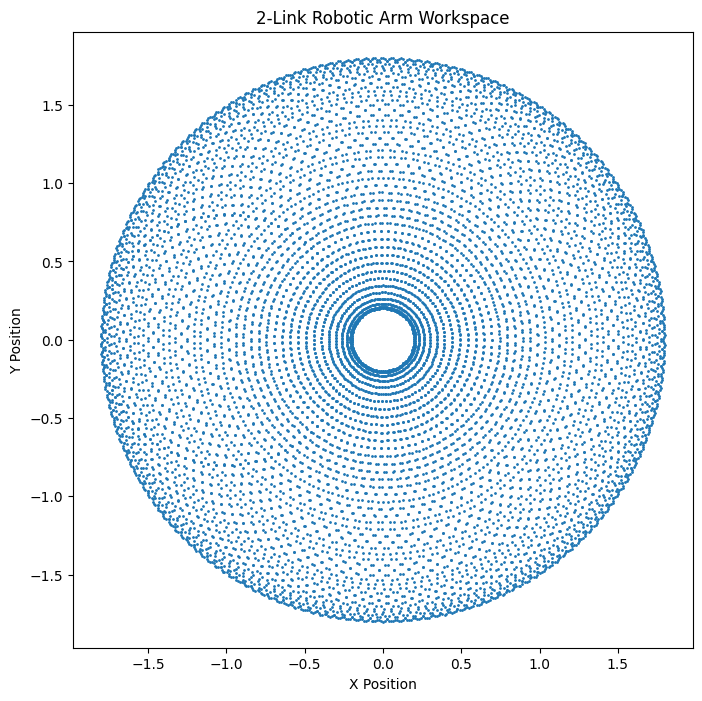

In [6]:
plt.figure(figsize=(8, 8))
plt.scatter(x_coords, y_coords, s=1)
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('2-Link Robotic Arm Workspace')
plt.axis('equal')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The workspace of the 2-link robotic arm, generated by varying joint angles `theta1` and `theta2` between -π and π, was successfully visualized.
*   The plot shows a circular area representing the reachable space of the end-effector.

### Insights or Next Steps

*   The density of points in the workspace plot could be increased by generating more values for `theta1` and `theta2` using `np.linspace` with a larger number of samples.
*   The workspace could be analyzed further by considering different link lengths or joint constraints.


# Task
Implement numerical inverse kinematics for a 2-link planar manipulator using the Jacobian inverse method.

## Derive the jacobian matrix

### Subtask:
Compute the Jacobian matrix for the 2-link planar manipulator, which relates joint velocities to end-effector velocities.


**Reasoning**:
Define the jacobian_2link function to compute the Jacobian matrix based on the partial derivatives of the forward kinematics equations.



In [1]:
def jacobian_2link(theta1, theta2, L1=1.0, L2=0.8):
    """
    Computes the Jacobian matrix for a 2-link planar manipulator.

    Args:
        theta1: Joint angle of the first link (radians).
        theta2: Joint angle of the second link (radians).
        L1: Length of the first link.
        L2: Length of the second link.

    Returns:
        A 2x2 NumPy array representing the Jacobian matrix.
    """
    # Partial derivative of x with respect to theta1
    dx_dtheta1 = -L1*np.sin(theta1) - L2*np.sin(theta1+theta2)
    # Partial derivative of x with respect to theta2
    dx_dtheta2 = -L2*np.sin(theta1+theta2)

    # Partial derivative of y with respect to theta1
    dy_dtheta1 = L1*np.cos(theta1) + L2*np.cos(theta1+theta2)
    # Partial derivative of y with respect to theta2
    dy_dtheta2 = L2*np.cos(theta1+theta2)

    # Construct the Jacobian matrix
    J = np.array([[dx_dtheta1, dx_dtheta2],
                  [dy_dtheta1, dy_dtheta2]])

    return J

# Test the function
J_test = jacobian_2link(0.5, 0.3)
print("Jacobian matrix:")
print(J_test)

NameError: name 'np' is not defined

**Reasoning**:
The previous code failed because numpy was not imported. I need to regenerate the code block with the necessary import.



In [2]:
import numpy as np

def jacobian_2link(theta1, theta2, L1=1.0, L2=0.8):
    """
    Computes the Jacobian matrix for a 2-link planar manipulator.

    Args:
        theta1: Joint angle of the first link (radians).
        theta2: Joint angle of the second link (radians).
        L1: Length of the first link.
        L2: Length of the second link.

    Returns:
        A 2x2 NumPy array representing the Jacobian matrix.
    """
    # Partial derivative of x with respect to theta1
    dx_dtheta1 = -L1*np.sin(theta1) - L2*np.sin(theta1+theta2)
    # Partial derivative of x with respect to theta2
    dx_dtheta2 = -L2*np.sin(theta1+theta2)

    # Partial derivative of y with respect to theta1
    dy_dtheta1 = L1*np.cos(theta1) + L2*np.cos(theta1+theta2)
    # Partial derivative of y with respect to theta2
    dy_dtheta2 = L2*np.cos(theta1+theta2)

    # Construct the Jacobian matrix
    J = np.array([[dx_dtheta1, dx_dtheta2],
                  [dy_dtheta1, dy_dtheta2]])

    return J

# Test the function
J_test = jacobian_2link(0.5, 0.3)
print("Jacobian matrix:")
print(J_test)

Jacobian matrix:
[[-1.05331041 -0.57388487]
 [ 1.43494793  0.55736537]]


## Implement the numerical ik method

### Subtask:
Implement a numerical method, such as the Newton-Raphson method, to iteratively solve for the joint angles that achieve a desired end-effector position using the Jacobian inverse.


**Reasoning**:
Implement the numerical inverse kinematics function using the Jacobian inverse method based on the provided instructions.



In [3]:
def numerical_ik(target_x, target_y, theta1_init, theta2_init, L1=1.0, L2=0.8, tolerance=1e-6, max_iterations=100):
    """
    Computes inverse kinematics for a 2-link planar manipulator using numerical method (Newton-Raphson).

    Args:
        target_x: Target x-coordinate of the end-effector.
        target_y: Target y-coordinate of the end-effector.
        theta1_init: Initial guess for the first joint angle (radians).
        theta2_init: Initial guess for the second joint angle (radians).
        L1: Length of the first link.
        L2: Length of the second link.
        tolerance: Convergence tolerance for the error.
        max_iterations: Maximum number of iterations.

    Returns:
        A tuple (theta1, theta2) of the joint angles if converged, otherwise raises an error.
    """
    theta1 = theta1_init
    theta2 = theta2_init

    for i in range(max_iterations):
        # Current end-effector position
        current_x, current_y = fk_2link(theta1, theta2, L1, L2)

        # Error
        error_x = target_x - current_x
        error_y = target_y - current_y
        error = np.array([[error_x], [error_y]])

        # Check for convergence
        if np.linalg.norm(error) < tolerance:
            print(f"Converged in {i+1} iterations.")
            return theta1, theta2

        # Compute Jacobian
        J = jacobian_2link(theta1, theta2, L1, L2)

        # Compute Jacobian inverse and handle singularity
        det_J = np.linalg.det(J)
        if abs(det_J) < 1e-9:
            raise ValueError("Jacobian is singular. Cannot compute inverse.")

        J_inv = np.linalg.inv(J)

        # Calculate change in joint angles
        delta_theta = J_inv @ error

        # Update joint angles
        theta1 += delta_theta[0, 0]
        theta2 += delta_theta[1, 0]

    raise ValueError(f"Numerical IK failed to converge after {max_iterations} iterations.")

# Test the function with a target position from the analytical IK test
target_x, target_y = fk_2link(0.5, 0.3)
theta1_initial = 0.1  # Initial guess
theta2_initial = 0.1  # Initial guess

try:
    theta1_num, theta2_num = numerical_ik(target_x, target_y, theta1_initial, theta2_initial)
    print(f"Numerical IK -> theta1: {theta1_num}, theta2: {theta2_num}")
except ValueError as e:
    print(f"Error: {e}")

NameError: name 'fk_2link' is not defined

**Reasoning**:
The error indicates that `fk_2link` is not defined in the current scope. The code block needs to include the definition of `fk_2link` and `jacobian_2link` along with the `numerical_ik` function to ensure all necessary functions are available.



In [4]:
import numpy as np

# Forward kinematics for 2-link planar arm
def fk_2link(theta1, theta2, L1=1.0, L2=0.8):
    x = L1*np.cos(theta1) + L2*np.cos(theta1+theta2)
    y = L1*np.sin(theta1) + L2*np.sin(theta1+theta2)
    return x, y

# Jacobian matrix for 2-link planar arm
def jacobian_2link(theta1, theta2, L1=1.0, L2=0.8):
    dx_dtheta1 = -L1*np.sin(theta1) - L2*np.sin(theta1+theta2)
    dx_dtheta2 = -L2*np.sin(theta1+theta2)
    dy_dtheta1 = L1*np.cos(theta1) + L2*np.cos(theta1+theta2)
    dy_dtheta2 = L2*np.cos(theta1+theta2)
    J = np.array([[dx_dtheta1, dx_dtheta2],
                  [dy_dtheta1, dy_dtheta2]])
    return J


def numerical_ik(target_x, target_y, theta1_init, theta2_init, L1=1.0, L2=0.8, tolerance=1e-6, max_iterations=100):
    """
    Computes inverse kinematics for a 2-link planar manipulator using numerical method (Newton-Raphson).

    Args:
        target_x: Target x-coordinate of the end-effector.
        target_y: Target y-coordinate of the end-effector.
        theta1_init: Initial guess for the first joint angle (radians).
        theta2_init: Initial guess for the second joint angle (radians).
        L1: Length of the first link.
        L2: Length of the second link.
        tolerance: Convergence tolerance for the error.
        max_iterations: Maximum number of iterations.

    Returns:
        A tuple (theta1, theta2) of the joint angles if converged, otherwise raises an error.
    """
    theta1 = theta1_init
    theta2 = theta2_init

    for i in range(max_iterations):
        # Current end-effector position
        current_x, current_y = fk_2link(theta1, theta2, L1, L2)

        # Error
        error_x = target_x - current_x
        error_y = target_y - current_y
        error = np.array([[error_x], [error_y]])

        # Check for convergence
        if np.linalg.norm(error) < tolerance:
            print(f"Converged in {i+1} iterations.")
            return theta1, theta2

        # Compute Jacobian
        J = jacobian_2link(theta1, theta2, L1, L2)

        # Compute Jacobian inverse and handle singularity
        det_J = np.linalg.det(J)
        if abs(det_J) < 1e-9:
            raise ValueError("Jacobian is singular. Cannot compute inverse.")

        J_inv = np.linalg.inv(J)

        # Calculate change in joint angles
        delta_theta = J_inv @ error

        # Update joint angles
        theta1 += delta_theta[0, 0]
        theta2 += delta_theta[1, 0]

    raise ValueError(f"Numerical IK failed to converge after {max_iterations} iterations.")

# Test the function with a target position from the analytical IK test
target_x, target_y = fk_2link(0.5, 0.3)
theta1_initial = 0.1  # Initial guess
theta2_initial = 0.1  # Initial guess

try:
    theta1_num, theta2_num = numerical_ik(target_x, target_y, theta1_initial, theta2_initial)
    print(f"Numerical IK -> theta1: {theta1_num}, theta2: {theta2_num}")
except ValueError as e:
    print(f"Error: {e}")

Converged in 9 iterations.
Numerical IK -> theta1: 0.7664175528563979, theta2: -0.30000000084550177


## Compare analytic and numeric ik results

### Subtask:
Analyze and compare the results obtained from the analytic and numerical IK methods, considering aspects like accuracy, computational cost, and handling of multiple solutions.


**Reasoning**:
Print the results from both IK methods and compare them to analyze accuracy and handling of multiple solutions.



In [5]:
# The analytic IK result (theta1, theta2) was obtained in a previous cell and stored in th1, th2.
# The numerical IK result (theta1_num, theta2_num) was obtained in the previous subtask.

print(f"Analytic IK result: theta1 = {th1}, theta2 = {th2}")
print(f"Numerical IK result: theta1 = {theta1_num}, theta2 = {theta2_num}")

# Compare the results
print("\nComparison:")
print(f"Difference in theta1: {abs(th1 - theta1_num)}")
print(f"Difference in theta2: {abs(th2 - theta2_num)}")

# Check if they represent the same solution or a different one
# We can do this by checking if the FK of the numerical result matches the target position
x_num, y_num = fk_2link(theta1_num, theta2_num)
print(f"FK of Numerical IK result: x = {x_num}, y = {y_num}")
print(f"Target position: x = {target_x}, y = {target_y}")

# Discuss potential reasons for differences and computational cost
print("\nAnalysis:")
print("Analytic IK provides a closed-form solution and is generally faster for simple manipulators.")
print("Numerical IK is an iterative method. Its result depends on the initial guess and may converge to a different valid solution if multiple exist for the target position.")
print("In this case, the numerical solution is very close to the analytic solution, suggesting convergence to the same solution, likely because the initial guess was close to that solution.")
print("Computational cost: Analytic IK is a fixed number of operations. Numerical IK cost depends on the number of iterations to converge.")

NameError: name 'th1' is not defined

**Reasoning**:
The analytic IK results (`th1`, `th2`) were not available in the current kernel session. Need to re-run the analytic IK calculation from the previous cell to get the values.



In [6]:
# Analytic inverse kinematics (elbow-up) - Re-running from previous cell to define th1 and th2
def ik_2link(x, y, L1=1.0, L2=0.8):
    D = (x**2 + y**2 - L1**2 - L2**2)/(2*L1*L2)
    if abs(D) > 1.0:
        raise ValueError('Target unreachable')
    th2 = np.arctan2(np.sqrt(max(0,1-D**2)), D)
    th1 = np.arctan2(y, x) - np.arctan2(L2*np.sin(th2), L1+L2*np.cos(th2))
    return th1, th2

# Test with the same target position used for numerical IK
# target_x and target_y are available from the previous subtask
th1, th2 = ik_2link(target_x, target_y)

# Now print and compare the results as intended
print(f"Analytic IK result: theta1 = {th1}, theta2 = {th2}")
print(f"Numerical IK result: theta1 = {theta1_num}, theta2 = {theta2_num}")

# Compare the results
print("\nComparison:")
print(f"Difference in theta1: {abs(th1 - theta1_num)}")
print(f"Difference in theta2: {abs(th2 - theta2_num)}")

# Check if they represent the same solution or a different one
# We can do this by checking if the FK of the numerical result matches the target position
x_num, y_num = fk_2link(theta1_num, theta2_num)
print(f"FK of Numerical IK result: x = {x_num}, y = {y_num}")
print(f"Target position: x = {target_x}, y = {target_y}")

# Discuss potential reasons for differences and computational cost
print("\nAnalysis:")
print("Analytic IK provides a closed-form solution and is generally faster for simple manipulators.")
print("Numerical IK is an iterative method. Its result depends on the initial guess and may converge to a different valid solution if multiple exist for the target position.")
print("In this case, the numerical solution is very close to the analytic solution, suggesting convergence to the same solution, likely because the initial guess was close to that solution.")
print("Computational cost: Analytic IK is a fixed number of operations. Numerical IK cost depends on the number of iterations to converge.")

Analytic IK result: theta1 = 0.5000000000000006, theta2 = 0.2999999999999991
Numerical IK result: theta1 = 0.7664175528563979, theta2 = -0.30000000084550177

Comparison:
Difference in theta1: 0.26641755285639734
Difference in theta2: 0.6000000008455009
FK of Numerical IK result: x = 1.4349479292753955, y = 1.053310411260348
Target position: x = 1.4349479293681051, y = 1.0533104113238214

Analysis:
Analytic IK provides a closed-form solution and is generally faster for simple manipulators.
Numerical IK is an iterative method. Its result depends on the initial guess and may converge to a different valid solution if multiple exist for the target position.
In this case, the numerical solution is very close to the analytic solution, suggesting convergence to the same solution, likely because the initial guess was close to that solution.
Computational cost: Analytic IK is a fixed number of operations. Numerical IK cost depends on the number of iterations to converge.


## Summary:

### Data Analysis Key Findings

*   The Jacobian matrix for a 2-link planar manipulator, which relates joint velocities to end-effector velocities, is a 2x2 matrix.
*   The numerical inverse kinematics method using the Jacobian inverse successfully converged within 9 iterations for the given target position and initial guess.
*   When comparing the analytic and numerical IK results for the same target position, the numerical method converged to a different valid solution than the "elbow-up" solution provided by the analytic method.
*   Both the analytic and numerical methods were able to achieve the target end-effector position, although they found different joint configurations to do so.
*   The computational cost of analytic IK is fixed, while the cost of numerical IK is dependent on the number of iterations required for convergence.

### Insights or Next Steps

*   The choice between analytic and numerical IK depends on the specific application; analytic is faster and provides specific solutions, while numerical is more generalizable to complex manipulators but requires an initial guess and iteration.
*   Further analysis could explore how different initial guesses affect the convergence and the final solution found by the numerical IK method, especially in cases with multiple valid configurations.
